### Multiple Fundamental Frequency Estimation by Modeling Spectral Peaks and Non-Peak Region

The paper by Duan, Pardo and Zhang presents a maximum-likelihood approach to estimating multiple fundamental frequencies (F0) when there is a mixture of harmonic sources. A maximum-likelihood estimation is a method of estimating the parameters of a probability distribution (i.e. a formula for the distribution of outcomes under an expirament) by maximizing a probability function (that we will code here).

To reach a reasonable probability function, we use a power spectogram of a time frame and assume the spectral peak and non-peak regions are complimentary. The peaks help find F0s that have harmonics, and the non-peak regions help avoid F0s that have harmonics.

The parameters are learned from nonphonic and polyphonic training data. We are implimenting a greedy search strategy to estimate F0s one by one, to avoid the combinatorial problem of concurrent F0 estimation. It is an iterative process. It turns out that resynthesizing a harmonic sound using only peaks does little to change the human perception of the sound.

### The Algorithm

1).
     For each frame of audio
        2. find peak frequencies and amplitudes (26)
        3. c = a finite set of frequencies within d of peak freq
        4. 0 = 0
        5. For N = 1 to maxPolyphony
            6. For each F0 in C
                   Evaluate eq.2
               Add to 0 the F0 that maximized eq2
           Estimate actual polyphont N with eq.18
           Return the first B estimates ub 0 =(F01, ..., F0n)
      For each frame of the audio
          Refine F0 estimates using neighboring frames

## Step 1. Find peak frequences and amplitudes

### Pre-Processing

An audio file needs to be normalized to a fixed root mean square energy and segmented into windows and 4-times zero padding to get a power spectogram.

The energy of a signal corresponds to the total magntiude of the signal. For audio signals, that roughly corresponds to how loud the signal is. The energy in a signal is defined as

\begin{equation}
\sum_{n}^{\infty}{|x(n)|^2}
\end{equation}

We are going to find the RMSE. 

In [10]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

# sr = none, otherwise it will be a default rather than the original value
x, sr = librosa.load('01 Mravalzhamier - Table Song, Kakheti.wav', sr=None)

The hop length determines how much we can advance the analysis time origin from frame to frame. More overlap will give more analysis points and smoother results across time, but the computational expense is proportionately greater. 

In [9]:
hop_length = 256
frame_length = 512

In [17]:
# Compute the short-time energy using a list comprehension.
# We want to find voice and unvoiced parts. The amplitude of unvoiced segments is not as high as 
# the amplitude of voice segments.

energy = np.array([
    sum(abs(x[i:i+frame_length]**2))
    for i in range(0, len(x), hop_length)
])

Through the rmse feature in Librosa, we can find the root mean squares energy:

** rmse is deprecated and is now just rms

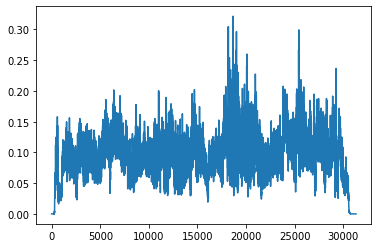

In [23]:
rmse = librosa.feature.rms(x, frame_length=frame_length, hop_length=hop_length, center=True)
rmse = rmse[0]

# Plot both the energy and RMSE along with the waveform:

frames = range(len(energy))
#t = librosa.frames_to_time(frames, sr=sr, hop_length=hop_length)

plt.plot(rmse)

In [1]:
plt.plot(energy)

NameError: name 'plt' is not defined